In [370]:
import pandas as pd

In [371]:
df = pd.read_csv("protein_localization_info.csv")
df.to_json("data.json", orient="records")

In [372]:
!echo '{"data":' | cat - data.json > data_n.json
!echo '}' >> data_n.json

In [374]:
df['Protein domains and families (by PFAM)']

0           LRAT(Lecithin retinol acyltransferase,PF04970)
1                                                      NaN
2                                PAN_1(PAN domain,PF00024)
3        CAP(Cysteine-rich secretory protein family,PF0...
4        Prot_ATP_ID_OB(Proteasomal ATPase OB C-termina...
                               ...                        
20220    CTP_transf_like(Cytidylyltransferase-like,PF01...
20221    V-set(Immunoglobulin V-set domain,PF07686);C2-...
20222    Filament_head(Intermediate filament head (DNA ...
20223                                                  NaN
20224    C2(C2 domain,PF00168);WW(WW domain,PF00397);WW...
Name: Protein domains and families (by PFAM), Length: 20225, dtype: object

In [4]:
# plot1

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import mpld3
import numpy as np
import seaborn as sns
import pandas as pd

In [14]:
df_color = pd.read_csv("simchrom_sl_func_domains_percent.csv", index_col=0).sort_index()
df_size = pd.read_csv("simchrom_sl_func_domains_number.csv", index_col=0).sort_index()

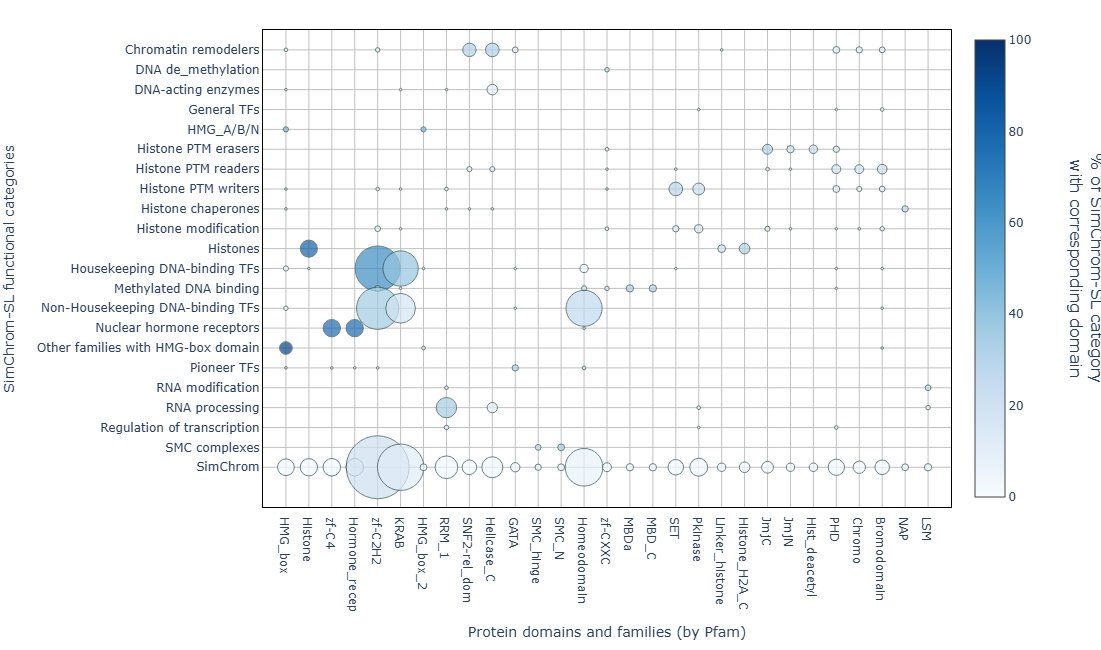

In [366]:
import plotly.graph_objects as go

n_rows, n_cols = df_size.shape
n_rows, n_cols = df_size.shape
x = np.arange(n_cols)
y = np.arange(n_rows)

x, y = np.meshgrid(x, y)

x = x.flatten()
y = y.flatten()


sizes = df_size.values.flatten()
colors = df_color.values.flatten()
mask = sizes != 0

fig = go.Figure(
    data=[
        go.Scatter(
            x=x[mask],
            y=y[mask],
            text=[
                f"{percent:.1f}%, {num:n} proteins"
                for num, percent in zip(sizes[mask], colors[mask])
            ],
            mode="markers",
            marker=dict(
                color=colors[mask],
                size=sizes[mask],
                showscale=True,
                opacity=0.7,
                colorscale="blues",
                cmax=100,
                cmin=0
                # colorscale=[(0, "white"),(100, "blue")]
                # size_max=30
            ),
            # ,width=500, height=600,size_max=30
        )
    ]
)

fig.update_layout(
    autosize=False,
    width=950,
    height=650,
    xaxis=dict(
        title="Protein domains and families (by Pfam)",
        tickmode="array",
        tickvals=np.arange(n_cols),
        ticktext=df_size.columns,
        gridcolor="silver",
        range=[-1, 29],
        # griddash="dot",
        zeroline=False,
        linewidth=1,
        linecolor="black",
        showline=True,
        mirror=True,
    ),
    yaxis=dict(
        # scaleanchor="x",
        # scaleratio=1,
        title="SimChrom-SL functional categories",
        tickmode="array",
        tickvals=np.arange(n_rows),
        ticktext=df_size.index,
        gridcolor="silver",
        range=[23, -1],
        zerolinecolor="black",
        zeroline=False,
        # griddash="dot",
        linewidth=1,
        linecolor="black",
        showline=True,
        mirror=True,
    ),
    coloraxis_colorbar={"title": ""},
    margin=dict(r=150,t=30),
    plot_bgcolor="white",
    dragmode=False,
    annotations=[
        dict(
            text="% of SimChrom-SL category<br>with corresponding domain",
            font_size=16,
            # font_family='arial',
            # font_color='red',
            textangle=90,
            showarrow=False,
            # ^^ appearance
            xref="paper",
            yref="paper",
            x=1.23,
            y=0.5,
            # ^^ position
        )
    ],
)

fig.update_traces(
    mode="markers",
    marker=dict(sizemode="area", sizeref=0.3, line_width=1, line_color="DarkSlateGrey"),
)

js_snippet = '''
var plot = $('#SHvsPfam_plot');
plot.on('plotly_click', function(data){
    var pts = '';
    var point = data.points[0];
    console.log(plot.layout.xaxis.ticktext[point.x]);
    console.log(plot.layout.yaxis.ticktext[point.y]);
});
'''
config = {
    'scrollZoom': False,  # Disable scroll to zoom
    'modeBarButtonsToRemove': ['zoom2d'],
    'displayModeBar': False,  # Hide the mode bar (toolbar)
    'doubleClick': False,  # Disable double click to reset zoom
    'editable': False,  # Disable edits like moving title and axes
    'staticPlot': False  # Disable all interactivity (makes the plot static)
}

fig.write_html("SHvsPfam_plot.html", full_html=False,div_id='SHvsPfam_plot',include_plotlyjs='js/plotly-2.35.2.min.js',config=config)
fig.show()

In [10]:
# plot

In [333]:
df_cooc = pd.read_csv("domain_coocurence.csv", index_col=0)
df_cooc_num = pd.read_csv("domain_coocurence_number.csv", index_col=0)

# s = df_cooc.sum()
# df_cooc = df_cooc[s.sort_values(ascending=False).index]
# s = df_cooc.sum(axis=1)
# df_cooc= df_cooc.loc[:,s.sort_values(ascending=False).index]

In [282]:
color_nodes = {'Pre-SET': 'olive',
 'SET': 'olive',
 'FYRC': 'olive',
 'FYRN': 'olive',
 'JmjC': 'green',
 'JmjN': 'green',
 'Chromo': 'yellow',
 'PHD': 'yellow',
 'PHD_2': 'yellow',
 'PWWP': 'yellow',
 'Tudor_2': 'yellow',
 'C5HCH': 'yellow',
 'EPL1': 'plum',
 'MOZ_SAS': 'plum',
 'zf-MYST': 'plum',
 'HDAC4_Gln': 'cadetblue',
 'Hist_deacetyl': 'cadetblue',
 'Bromodomain': 'red',
 'Pkinase': 'blue',
 'Pkinase_C': 'blue',
 'PI3_PI4_kinase': 'blue',
 'Helicase_C': 'pink',
 'SNF2-rel_dom': 'pink',
 'DUF1087': 'pink',
 'CHDII_SANT-like': 'pink',
 'Chromo_shadow': 'pink',
 'HSA': 'pink',
 'DPF1-3_N': 'pink',
 'AWS': 'brown',
 'Myb_DNA-binding': 'brown',
 'zf-C5HC2': 'brown',
 'zf-HC5HC2H': 'brown',
 'zf-C2H2': 'brown',
 'zf-HC5HC2H_2': 'brown',
 'zf-CXXC': 'brown',
 'PHD_4': 'brown',
 'SWIRM': 'brown',
 'GATA': 'brown',
 'zf-C3HC4_2': 'brown',
 'ARID': 'brown',
 'PLU-1': 'brown',
 'WSD': 'brown',
 'BRK': 'lightgray',
 'ECH_1': 'lightgray',
 'BET': 'lightgray',
 'CHDNT': 'lightgray',
 'CHDCT2': 'lightgray',
 'F-box': 'lightgray',
 'JHD': 'lightgray',
 'BAH': 'lightgray',
 'MTA_R1': 'lightgray',
 'C1_1': 'lightgray',
 'RAWUL': 'lightgray',
 'PAS': 'lightgray',
 'PAS_11': 'lightgray',
 'Mtf2_C': 'lightgray',
 'UCH': 'lightgray',
 'DDT': 'lightgray',
 'ELM2': 'lightgray',
 'FATC': 'lightgray',
 'zf-UBP': 'lightgray',
 'zf-MYND': 'lightgray'}
color_cats = [
    ("Writer of histone Me", 'olive'),
    ("Eraser of histone Me", 'green'),
    ("Reader of histone Me", 'yellow'),
    ("Writer of histone Ac", 'red'),
    ("Eraser of histone Ac", 'plum'),
    ("Reader of histone Ac", 'cadetblue'),
    ("Writer of (histone) Ph", 'blue'),
    ("Chromarin remodelers", 'pink'),
    ("DNA binding", 'brown'),
    ('Other', 'lightgray')
]
color_to_cat = {col:cat for cat,col in color_cats}



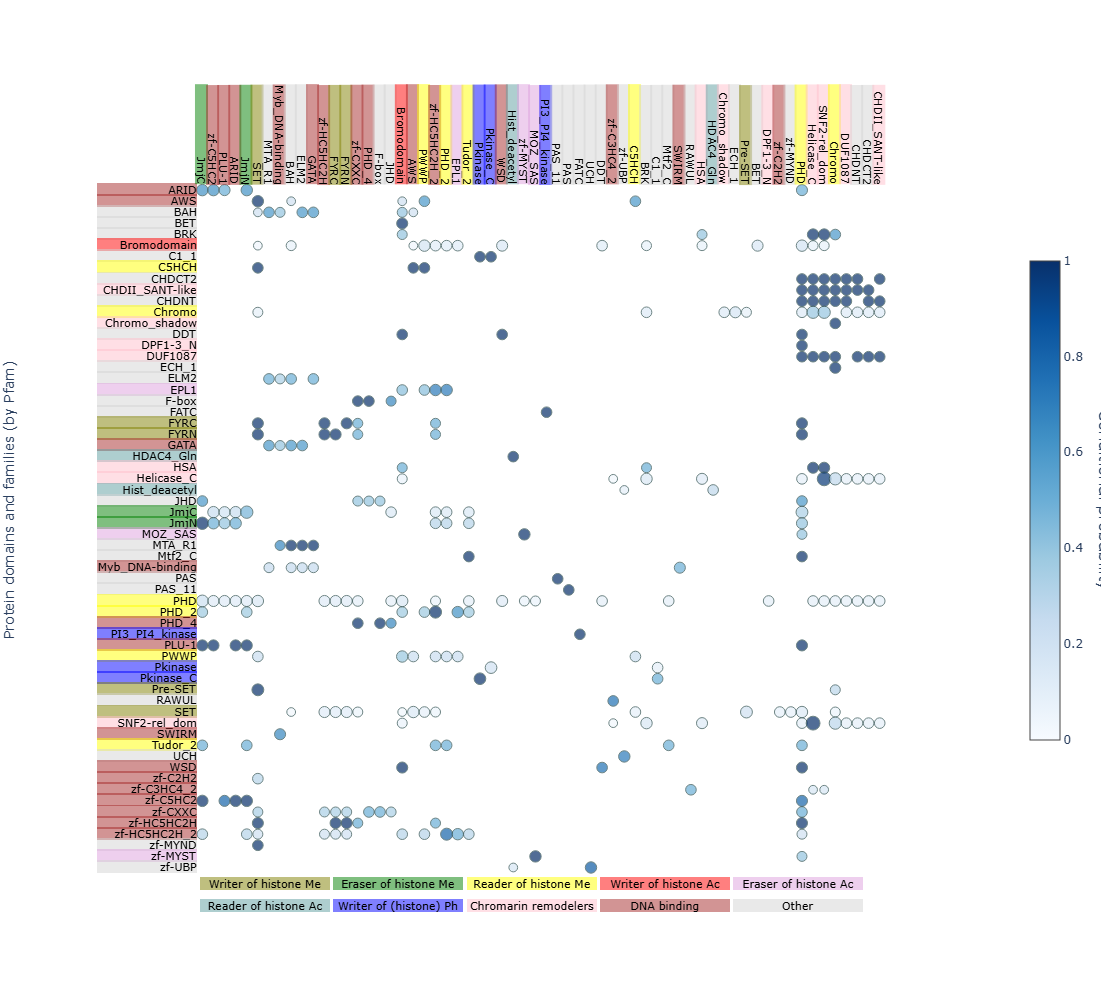

In [365]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.colors as mcolors


n_rows, n_cols = df_cooc.shape
n_rows, n_cols = df_cooc.shape
x = np.arange(n_cols)
y = np.arange(n_rows)

x, y = np.meshgrid(x, y)

x = x.flatten()
y = y.flatten()


sizes = df_cooc_num.values.flatten()
colors = df_cooc.values.flatten()
mask = colors >0.01

fig = go.Figure(
    data=[
        go.Scatter(
            x=x[mask],
            y=y[mask],
            text=[
                f"{percent:.2f}%, {num:n} proteins"
                for num, percent in zip(sizes[mask], colors[mask])
            ],
            mode="markers",
            marker=dict(
                color=colors[mask],
                size=np.log(sizes[mask]*10)*10,
                showscale=True,
                # opacity=1,
                colorscale="blues",
                cmax=1,
                cmin=0,
                colorbar=dict(        
                    len=0.5,                 # Colorbar length (fraction of plot height)
                )
                # colorscale=[(0, "white"),(100, "blue")]
                # size_max=30
            ),
        )
    #     go.Heatmap(
    #     z=df_cooc.values,
    #     x=df_cooc.columns, 
    #     y=df_cooc.index, 
    #     colorscale='blues',
    # ),
    ]
)
def get_annot(posx,posy, text,ori,bg_color,width=100,align='right',hover=True):
    c = mcolors.to_rgb(bg_color)
    return dict(
        x=posx,
        y=posy,
        text=text,
        showarrow=False,
        font=dict(
            # family="Courier New, monospace",
            size=11,
            color="black"
            ),
        align=align,
        valign='middle',
        height=13,
        width=width,
        xanchor='right',
        yanchor='bottom',
        textangle=0 if ori=='h' else 90,
        borderwidth=0,
        borderpad=0,
        # bordercolor=f'rgba({c[0]}, {c[1]}, {c[2]}, 0.5)',
        bgcolor=f'rgba({c[0]*255}, {c[1]*255}, {c[2]*255}, 0.5)',
        opacity=1.0,
        hovertext=f'{text}<br>{color_to_cat[bg_color]}' if hover else None,
        name='lol'
        )
annotations_y = [ get_annot(-0.5,pos+0.5,text,'h',color_nodes[text]) for pos,text in enumerate(df_cooc.index)]
annotations_x = [ get_annot(pos+0.5,-0.5,text,'v',color_nodes[text]) for pos,text in enumerate(df_cooc.columns)]
annotations_x.append(
    dict(
            text="Conditional probability",
            font_size=16,
            # font_family='arial',
            # font_color='red',
            textangle=90,
            showarrow=False,
            # ^^ appearance
            xref="paper",
            yref="paper",
            x=1.12,
            y=0.5,
            # ^^ position
        )
)
fig.update_traces(
    mode="markers",
    marker=dict(sizemode="area", sizeref=0.6, line_width=1, line_color="DarkSlateGrey"),
)
annotations_legend1 = [get_annot(11.5+ pos*12,63,text,'h',color,width=130,align='center',hover=False) for pos,(text,color) in enumerate(color_cats[:5])]
annotations_legend2 = [get_annot(11.5+pos*12,65,text,'h',color,width=130,align='center',hover=False) for pos,(text,color) in enumerate(color_cats[5:])]
fig.update_layout(height=1000, width=1000,
                 xaxis=dict(
                     # tickmode="array",
                    tickmode='array',
                    tickvals=list(range(len(df_cooc.columns))),
                    ticktext=df_cooc.columns,
                    constrain='domain',
                    scaleanchor='y', 
                    # title='Protein domains and families (by Pfam)',
                    showticklabels=False,
                    automargin=True,
                ),
                yaxis=dict(
                    tickmode='array',
                    tickvals=list(range(len(df_cooc.index))),
                    ticktext=df_cooc.index,
                    autorange='reversed',
                    scaleanchor='x', 
                    constrain='domain',
                    title='Protein domains and families (by Pfam)',
                    showticklabels=False,
                    automargin=True
                ),
                  annotations=annotations_y+annotations_x+annotations_legend1+annotations_legend2,
                  margin=dict(l=30, r=100, t=1, b=1),
                  plot_bgcolor="white",
                  dragmode=False
                )
config = {
    'scrollZoom': False,  # Disable scroll to zoom
    'modeBarButtonsToRemove': ['zoom2d'],
    'displayModeBar': False,  # Hide the mode bar (toolbar)
    'doubleClick': False,  # Disable double click to reset zoom
    'editable': False,  # Disable edits like moving title and axes
    'staticPlot': False  # Disable all interactivity (makes the plot static)
}
fig.write_html("PfamvsPfam_plot.html", full_html=False,div_id='PfamvsPfam_plot',include_plotlyjs='js/plotly-2.35.2.min.js',config=config)
fig.show()